In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("kindle_data.csv")

#Trim whitespaces frim column names -> durch die Erweiterung Rainbow sind whitespaces enstanden, die raus müssen
df.columns = df.columns.str.strip()
df.columns

df.head()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


In [4]:
#remove column

df_new = df.drop(["imgUrl", "productURL"], axis=1)
df_new.head()

,asin,title,author,soldBy,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


In [5]:
#in Dataframe df = Replace im Dataframe df die NaN -> er würde sonst das NaN nicht erkennen
df_new = df_new.replace("NaN", np.nan)

#check for None/NaN
print(df.isnull().sum())

#Reihen mit NaN entfernen
df_new.dropna(inplace=True)

df_new.head()

asin                     0
title                    0
author                 425
soldBy                9233
imgUrl                   0
productURL               0
stars                    0
reviews                  0
price                    0
isKindleUnlimited        0
category_id              0
isBestSeller             0
isEditorsPick            0
isGoodReadsChoice        0
publishedDate        49016
category_name            0
dtype: int64


,asin,title,author,soldBy,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


In [6]:
#Dataset auf doppelte Titel testen
title_counts = df_new["title"].value_counts()
num_duplicates = len(title_counts[title_counts > 1])

print(title_counts)

print(f"\nEs sind {num_duplicates} doppelte Titel enthalten")


title
Organic Chemistry                                                                                                                              7
Macroeconomics                                                                                                                                 6
Social Psychology                                                                                                                              5
College Algebra                                                                                                                                5
Criminal Evidence                                                                                                                              5
                                                                                                                                              ..
Cellphone Investigation Series: Preparing, Analyzing, and Mapping Verizon Records (Cell Phone Investigation Series: Carrier 

In [7]:
#Duplikate filtern

df_new_unique = df_new.drop_duplicates(subset=["title"])

df_new_unique.head()

,asin,title,author,soldBy,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


In [8]:
#Das Dataset ist sehr groß, deshalb wird es eingegrenzt anhand der Bewertungen

df_new_unique['reviews'].describe()


count     77213.000000
mean        648.430394
std        5080.762719
min           0.000000
25%           0.000000
50%           0.000000
75%         192.000000
max      618227.000000
Name: reviews, dtype: float64

Der Durchschnitt der Bewertungen pro Titel liegt bei 648. Die meisten Bücher haben 192 oder weniger Bewertungen.

In [9]:
df_new_unique = df_new_unique[df_new_unique['reviews'] >= 648]

#df_new_unique['reviews'].describe()

df_new_unique.sort_values("reviews", ascending=False)

,asin,title,author,soldBy,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
28874,B078GD3DRG,Where the Crawdads Sing,Delia Owens,Penguin Group (USA) LLC,4.7,618227,12.99,False,5,False,True,False,2018-08-14,Literature & Fiction
28641,B00JO8PEN2,The Nightingale: A Novel,Kristin Hannah,Macmillan,4.7,289251,11.99,False,5,False,True,False,2015-02-03,Literature & Fiction
28634,B0976V6YSL,Reminders of Him: A Novel,Colleen Hoover,Amazon.com Services LLC,4.7,242575,5.99,True,5,False,True,False,2022-01-18,Literature & Fiction
28654,B085BVSXS9,The Midnight Library: A Novel,Matt Haig,Penguin Group (USA) LLC,4.3,234933,13.99,False,5,False,True,False,2020-09-29,Literature & Fiction
28816,B01KGZVTOE,Eleanor Oliphant Is Completely Fine: A Novel,Gail Honeyman,Penguin Group (USA) LLC,4.5,227722,1.99,False,5,False,False,True,2017-05-09,Literature & Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33963,B001ANYDJ0,Traitor to His Class: The Privileged Life and ...,H. W. Brands,Random House LLC,4.6,648,13.99,False,9,False,True,False,2008-11-04,Biographies & Memoirs
71379,B00119QGMA,Close Range: Wyoming Stories,Annie Proulx,Simon and Schuster Digital Sales Inc,4.4,648,14.99,False,28,False,False,False,2007-12-01,LGBTQ+ eBooks
46687,B000FC1TGW,Being Logical: A Guide to Good Thinking,D.Q. McInerny,Random House LLC,4.3,648,10.99,False,14,False,False,False,2004-08-03,Politics & Social Sciences
81016,B01M656H4J,The Designer's Dictionary of Color,Sean Adams,Amazon.com Services LLC,4.6,648,9.99,False,1,False,False,False,2022-03-31,Arts & Photo graphy


In [10]:
# Handle outliers in Salary using IQR method

Q1 = df_new_unique["reviews"].quantile(0.25)
Q3 = df_new_unique["reviews"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_new_unique["reviews"] = df["reviews"].clip(lower_bound, upper_bound) 

df_new_unique['reviews'].describe()

count    10417.000000
mean      2489.464049
std       2014.286737
min        648.000000
25%        975.000000
50%       1597.000000
75%       3277.000000
max       6730.000000
Name: reviews, dtype: float64

### 1. Existiert ein Zusammenhang zwischen dem Preis und Ratings?

- Je höher das Rating desto beliebter das Buch und testo teurer?

stars
3.3     5.990000
3.4     6.590000
3.6     8.065000
3.8     8.434688
3.9     8.604571
3.7     8.770667
4.0     9.307651
4.1     9.471757
4.2     9.478455
4.3     9.488598
4.4     9.760683
4.5    10.354409
4.6    10.906652
4.7    11.387959
4.8    12.154102
3.5    13.323333
4.9    13.628977
Name: price, dtype: float64


<Axes: xlabel='stars', ylabel='price'>

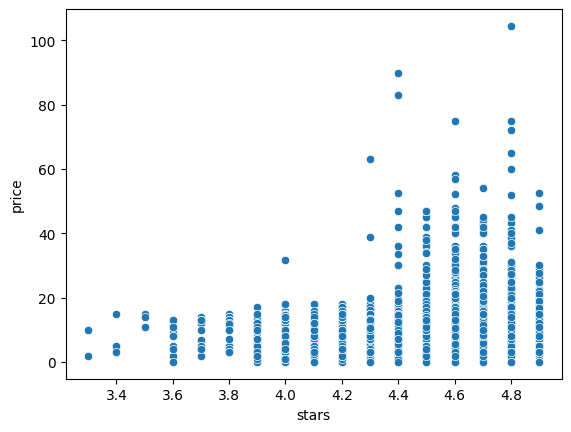

In [11]:
# Testen mit Scatter-Plot

relation_price_stars = df_new_unique.groupby("stars")["price"].mean().sort_values(ascending=True)

print(relation_price_stars)

sns.scatterplot(data = df_new_unique, x = "stars", y = "price") # da in der Datei die Daten nur eine Nachkommastelle haben 

Wird der Scatterplot betrachtet, so kann die Aussage getroffen werden, dass der Preis nicht im Zusammenhang mit der Bewertung steht. Die meisten Bücher mit einer Wertung zwischen 4.5 bis 4.8 am teuersten. (man könnte hier noch auf Signifikanz mit dem P-Wert testen, ob das Ergbenis signifikant ist oder nicht.)

- Die Signifikanz misst, ob eine gemachte Beobachtung auch tatsächlich etwas zu bedeuten hat oder zufällig entstanden sein könnte.
- Man könnte die Bücher mit den höchsten Ratings teurer machen, da Menschen sie mit hoher wahrscheinlichkeit eher kaufen als solche mit niedrigen Ratings.

### 2. Top 10

Text(0.5, 1.0, 'Top 10 Authors nach Rating')

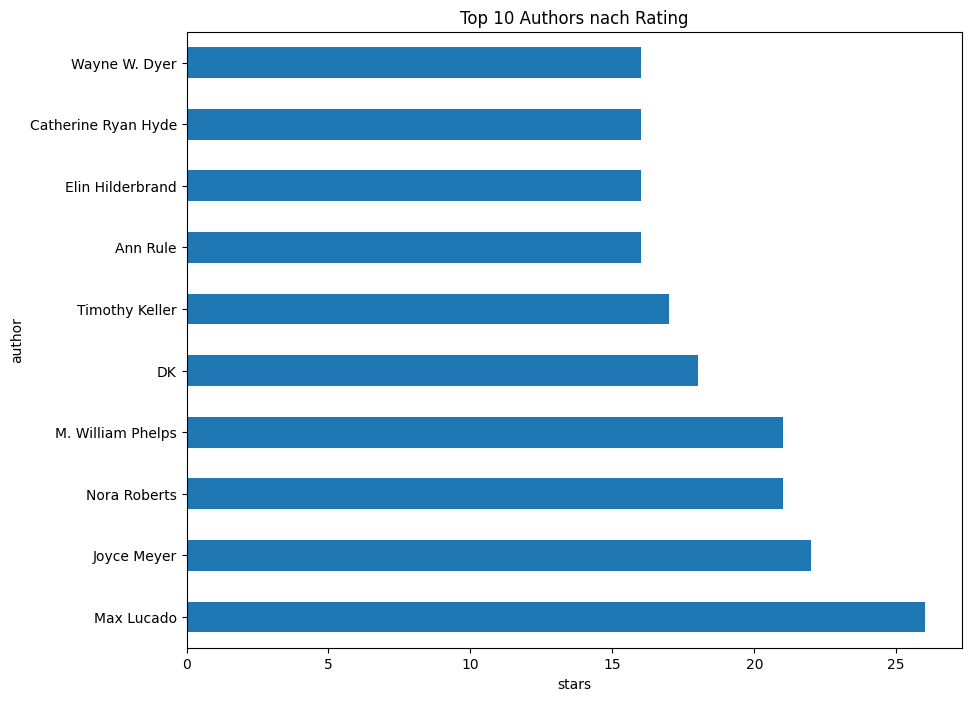

In [12]:
# Top 10 Autoren nach Rating

top_10_authors = df_new_unique.groupby("author")["stars"].count().sort_values(ascending=False).head(10).plot(kind = 'barh', figsize = (10,8))
plt.ylabel("author")
plt.xlabel("stars")
plt.title("Top 10 Authors nach Rating")

Text(0.5, 1.0, 'Top 10 Category by number of Reviews')

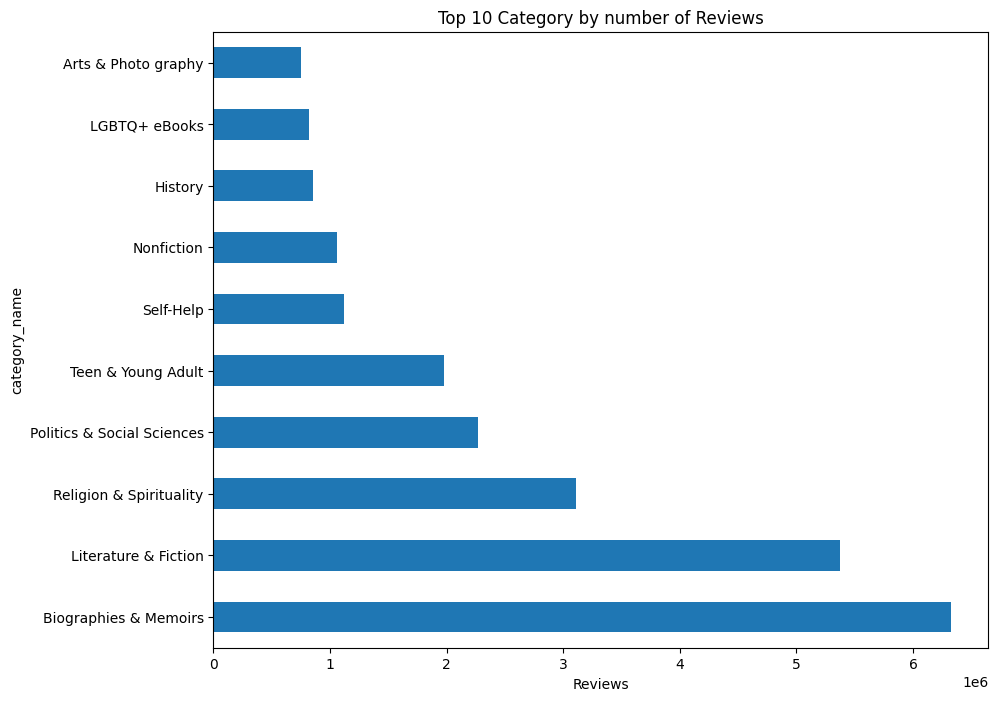

In [13]:
#Top 10 Kategorien  nach Reviewnumber

top10_kategories_by_reviewnumber = df_new_unique.groupby("category_name")["reviews"].sum().sort_values(ascending=False).head(10).plot(kind = 'barh', figsize = (10,8))
plt.ylabel("category_name")
plt.xlabel("Reviews")
plt.title("Top 10 Category by number of Reviews")

**Man kann davon ausgehen, dass je mehr Reviews die Bücher aufweisen, desto mehr wurden sie gekauft. D.h. man könnte die am meisten gekauften Bücherkategorien teurer verkaufen um mehr Gewinn zu erziehlen.**

Text(0.5, 1.0, 'Top 10 Category')

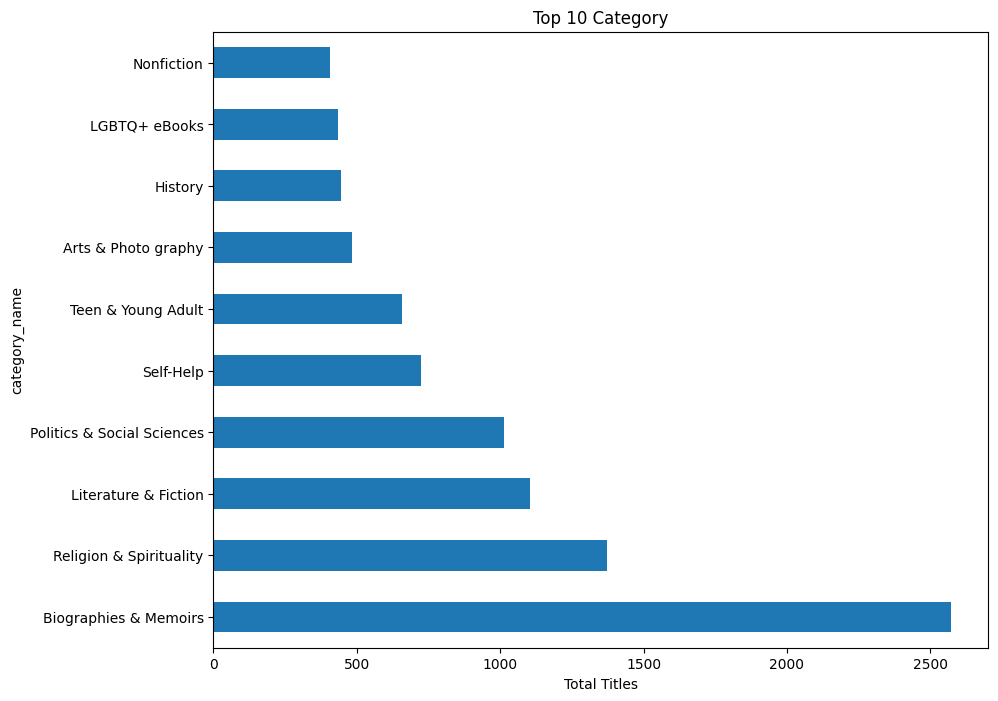

In [14]:
# Top 10 Bücher in Kategorien 

top10_kategories = df_new_unique.groupby("category_name")["category_name"].count().sort_values(ascending=False).head(10).plot(kind = 'barh', figsize = (10,8))
plt.ylabel("category_name")
plt.xlabel("Total Titles")
plt.title("Top 10 Category")

### 3. Top 10 highest rating in Biographien und Memoirs

In [15]:
top10_rating_bio = df_new_unique[df_new_unique["category_name"] == "Biographies & Memoirs"].sort_values(by = 'reviews',ascending = False)
top10_rating_bio.head()

,asin,title,author,soldBy,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
32760,B0BCP3JP6F,Spare,"Prince Harry, The Duke of Sussex",Random House LLC,4.5,6730,17.99,False,9,False,True,False,2023-01-10,Biographies & Memoirs
32763,B0024CEZR6,The 48 Laws of Power,Robert Greene,Penguin Group (USA) LLC,4.7,6730,16.99,False,9,False,False,False,2000-09-01,Biographies & Memoirs
32764,B07Q5TL9SQ,"If You Tell: A True Story of Murder, Family Se...",Gregg Olsen,Amazon.com Services LLC,4.3,6730,2.49,True,9,True,False,False,2019-12-01,Biographies & Memoirs
32767,B08DMXF7ZZ,Crying in H Mart: A Memoir,Michelle Zauner,Random House LLC,4.4,6730,13.99,False,9,False,True,False,2021-04-20,Biographies & Memoirs
32770,B009U9S6FI,Man's Search for Meaning,Viktor E. Frankl,Penguin Random House Publisher Services,4.7,6730,9.99,False,9,True,False,False,2006-06-01,Biographies & Memoirs


**Man kann die Top 10 Bücher in der Kategorie Biograpgie und Memoires teurer verkaufen. Dies kann für jede am meisten verkaufte Kategorie angewendet werden**

Text(0.5, 1.0, 'Top 10 Category by number of Reviews')

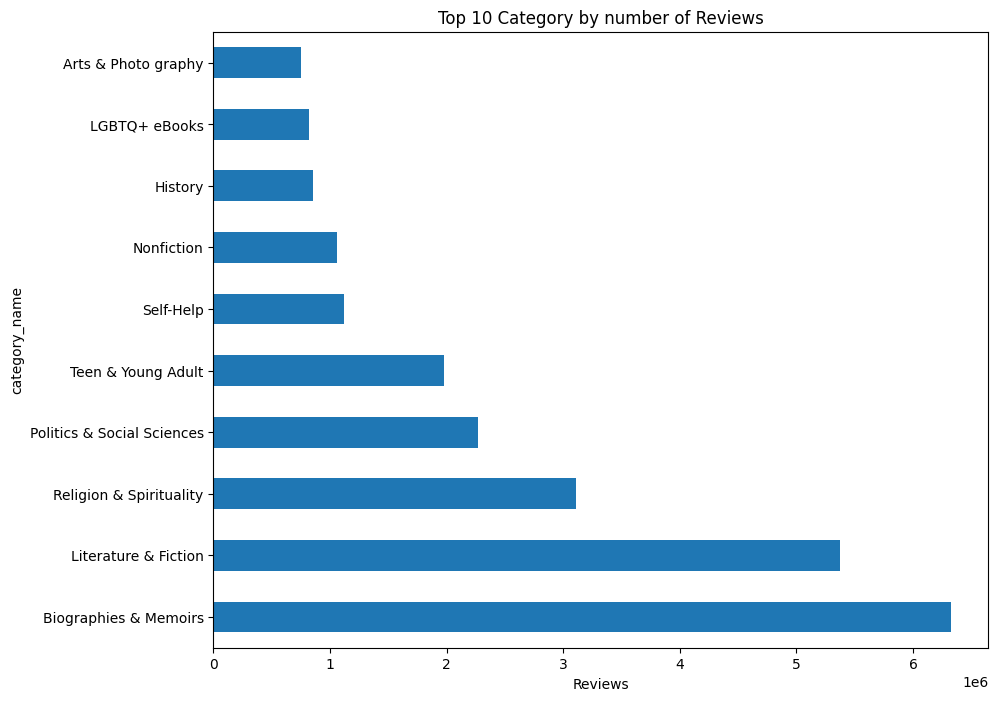

In [16]:
top10_kategories_by_reviewnumber = df_new_unique.groupby("category_name")["reviews"].sum().sort_values(ascending=False).head(10).plot(kind = 'barh', figsize = (10,8))
plt.ylabel("category_name")
plt.xlabel("Reviews")
plt.title("Top 10 Category by number of Reviews")

### 4. Bücher-Popularität nach verschiedene Aspekten (Kindle Unlimited, Bestseller, Editors Pick, Goodreads choice)

In [17]:
df_new_unique[["isKindleUnlimited", "isBestSeller", "isEditorsPick","isGoodReadsChoice"]].sum()

isKindleUnlimited    1804
isBestSeller          295
isEditorsPick        1341
isGoodReadsChoice     394
dtype: int64

Text(0.5, 1.0, 'Reviews vs Rating Stars - Kindle Unlimited')

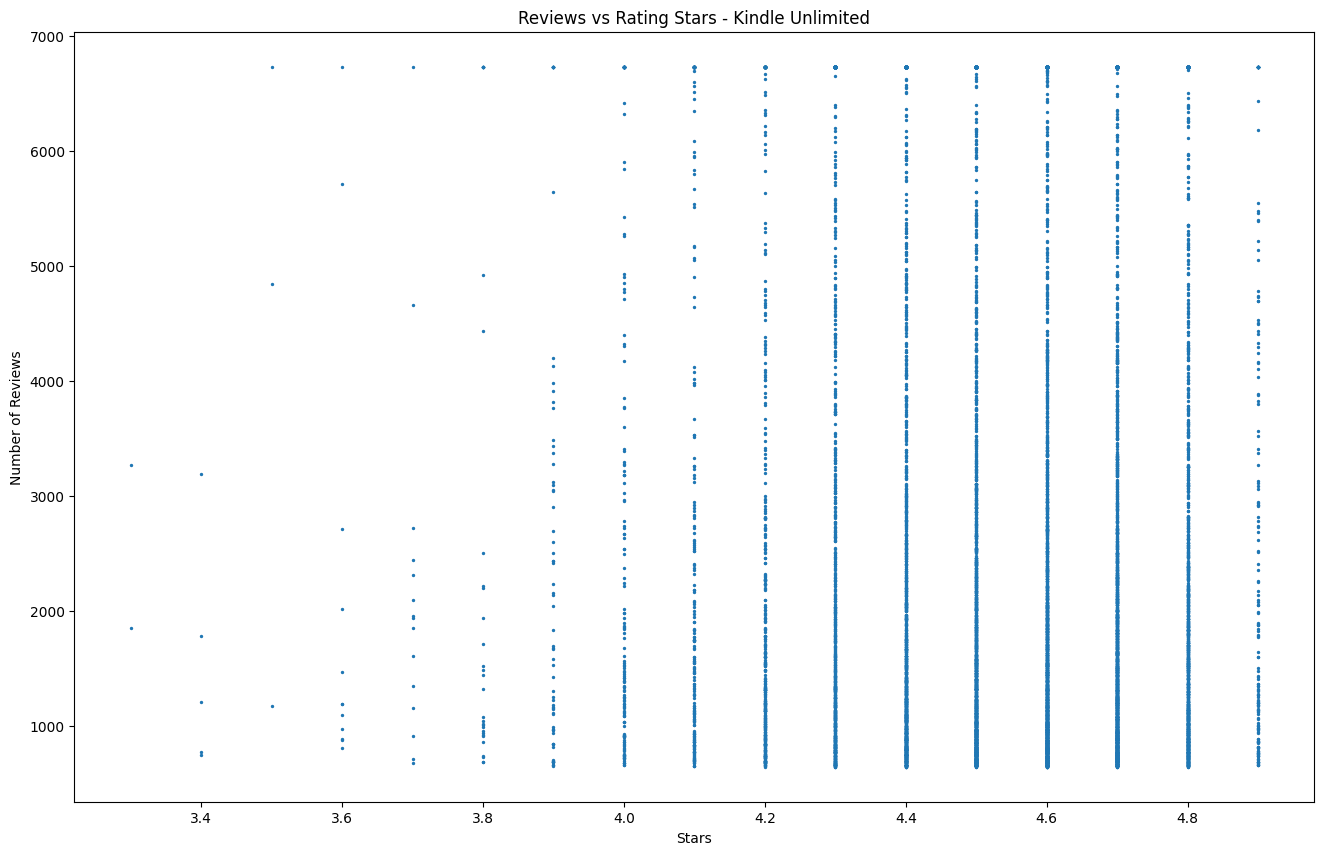

In [18]:
avg_kindle_unlimited_reviews = df_new_unique.plot(kind='scatter',x='stars',y='reviews',figsize=(16,10), s = 2)
plt.ylabel('Number of Reviews')
plt.xlabel('Stars')
plt.title('Reviews vs Rating Stars - Kindle Unlimited')


Text(0.5, 1.0, 'Reviews vs Rating Stars - Goodreads Choice')

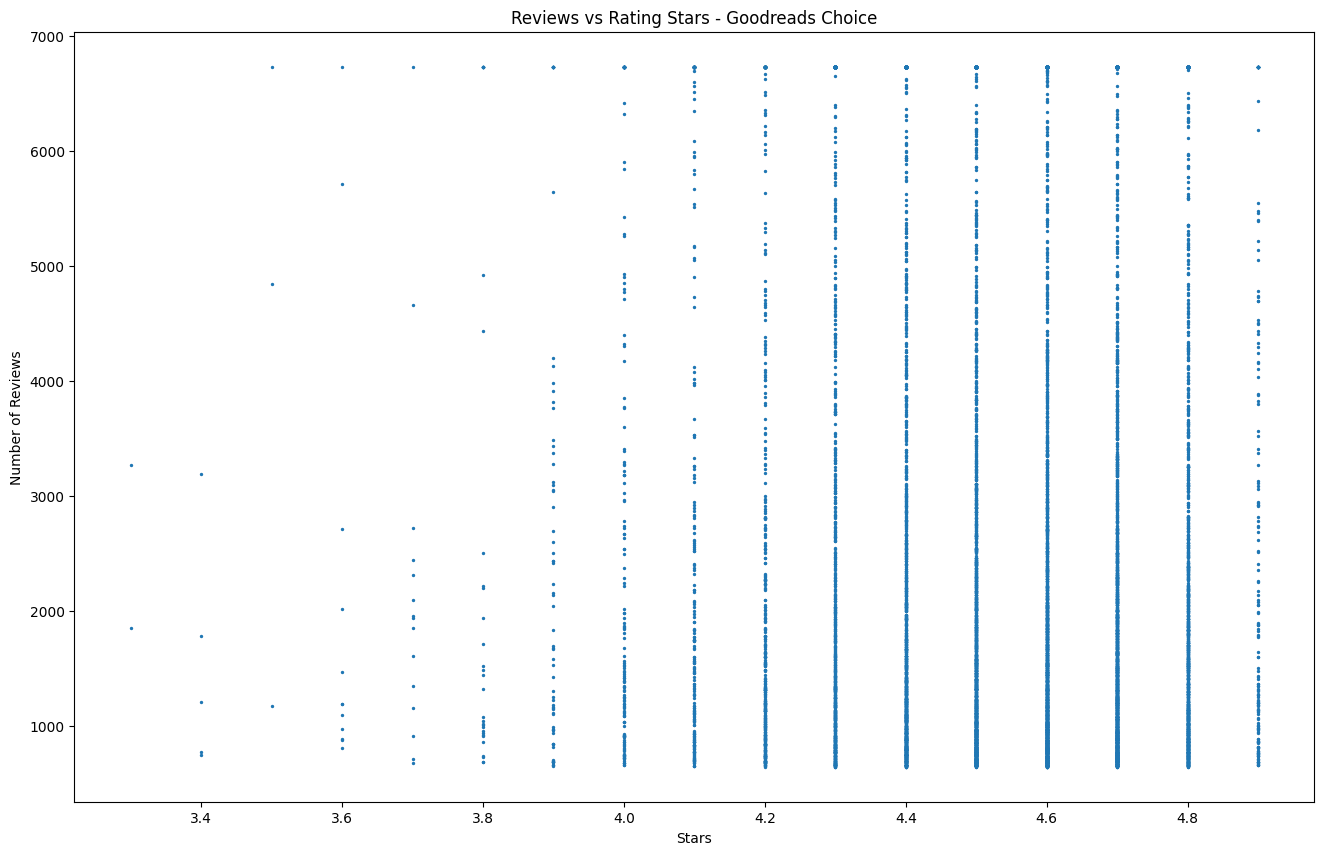

In [19]:
avg_goodreads_reviews = df_new_unique.plot(kind="scatter",x="stars",y="reviews",figsize=(16,10), s = 2)
plt.ylabel("Number of Reviews")
plt.xlabel("Stars")
plt.title("Reviews vs Rating Stars - Goodreads Choice")

## Frage:

1. Wie kann man die Grafik "avg_rating_by_auhtor.png" besser darstellen? 
   - Könnte man den Datensatz noch verkleinern?
   - Grafik größer machen oder wird sie dann zu groß?

2. Mit Arbeiten mit Spalten "is KindleUnlimited" und "isBestSeller": Wie mache ich das am besten, wenn ich z.B. die Bestseller nach Autoren aufbereiten möchte?
   1. gleiches Problem wie in 1.

In [20]:
####Count Plot - Number of isBestseller by Author
    #number of employees in each department.

# Create the count plot
plt.figure(figsize=(1, 30))
sns.countplot(data = df_new_unique, y="author")

# Set plot title and labels
plt.title("Number of Bestseller by Author")
plt.ylabel("author")
plt.xlabel("Number of Bestseller")

#plt.savefig('Number of Bestseller by Author.png')
# Show plot
plt.show()

In [1]:
plt.figure(figsize=(15, 30))

sns.countplot(data=df_new_unique, y="author", palette="viridis", orient="h")
plt.xscale("log")

plt.title("Number of Bestsellers by Author (Log Scale)")
plt.ylabel("Author")
plt.xlabel("Number of Bestsellers (Log Scale)")

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

In [ ]:
plt.figure(figsize=(15, 30))  # Increase width and height

sns.countplot(data=df_new_unique, y="author", palette="viridis", orient="h")

plt.title("Number of Bestsellers by Author")
plt.ylabel("Author")
plt.xlabel("Number of Bestsellers")

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 15))

# Select top N authors with the most bestsellers
top_authors = df_new_unique['author'].value_counts().head(20).index
sns.countplot(data=df_new_unique[df_new_unique['author'].isin(top_authors)], y="author", order=top_authors)

plt.title("Top 20 Authors by Number of Bestsellers")
plt.ylabel("Author")
plt.xlabel("Number of Bestsellers")

plt.tight_layout()
plt.show()
